In [456]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [457]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [458]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [459]:
survey  = 'gama'
version = 'GAMA4'
dryrun  = False

In [460]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
575459,588848899895132749,140.00962184,-0.15778122,19.201881,0.17428,4,G09_Y2_030_290,6,21.620457,20.158827,19.104753,18.518423,18.206768,0.17428,592.6005404809401,38.86381021621107,G9,0,0,-386.6374059876321,324.3166754431326,-1.3897045838965796,383.8980285026102,-327.5528588597247,-1.7746331429809525,1.0540733,19.201881,0.8639600685772892,0,6,-0.014663094259624754,0.17545017090332032,0.2130532306531508,0.5367595206251695,0.7303670437682157,0.8,-0.1690516,-0.13942401,-19.70593043569002,-19.735558027061558,-19.874982038172817,38.90781184438143,39.07686344686422,38.937439435752964,-0.05791565914441349,0.07536212516738633,0.15880921921778762,0.3405374148810496,-19.651686424254656,0.5981178,0.2210514224095772,0.0,-7.2018814,0.007362869100219746,0.0
3897040,588010931368165667,130.31244933,-0.89151632,18.104918,0.08585,4,G09_Y2_019_020,6,19.572409,18.506824,18.077213,17.800508,17.696072,0.08585,274.8623903406085,37.19557659508922,G9,0,0,-163.74471894731764,192.9961188800888,-3.9385342257768943,162.11380910055132,-194.36471114723605,-4.101084895799624,0.4296112,18.104918,0.4445410105042873,0,3,-0.10910600457853067,-0.12403580902811587,0.08074524817794687,0.08639628039550101,0.42396017383713336,2.12,-0.083274506,-0.182002,-19.088129810989585,-18.98940232396194,-19.171404317022052,37.1930473372347,37.27632184326717,37.09431985020706,-0.11485377969255195,-0.13266404536643348,0.10187109866964916,0.1325112443472298,-19.109255661481285,1.6950817,0.1920708259865173,0.0,-6.1049175,0.005246390918460482,0.0
601205,588848900431544435,138.90612555,0.27857838,19.362484,0.24948,4,G09_Y1_HS2_285,6,20.7944,19.821543,19.258896,19.01315,18.871838,0.24948,888.2239138152444,39.74261230792502,G9,0,0,-535.732888570551,467.2487324187023,3.4563380666456793,531.7924546586355,-471.7322255781404,2.9231207808078117,0.56264687,19.362484,0.29003288304579516,0,2,-0.1600955070168144,0.11251847578211702,0.00663762080412475,0.27710336839652366,0.2921811182523276,2.12,-0.2419956,-0.5288976,-20.144770347611516,-19.857868366973012,-20.38676595045766,39.507254325883004,39.74924992872915,39.2203523452445,-0.019840722580799386,0.2841163758293097,0.19688415578140173,0.5492916655429729,-20.335016882588793,0.43751526,0.31580453411664566,0.0,-7.362484,0.007816146248156935,0.0
485631,587729777982112149,216.61629277,-1.79543898,19.484274,0.131,4,G15_Y6_096_030,5,20.909975,20.018244,19.571632,19.285532,19.046059,0.131,432.8881364616763,38.18187841948124,G15,0,0,-307.0611485445811,-228.17923915149026,-11.99195529556989,308.9547657852068,225.59197877709622,-12.301744881253132,0.4466114,19.484274,0.40426383674125016,0,3,-0.09950768692835966,-0.05716011925066454,0.08404827145409753,0.14113338958776595,0.3895262862852769,2.12,-0.12707,-0.27771997,-18.65458278560563,-18.50393280589505,-18.781652780412873,38.13885669612809,38.2659266909

In [461]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZSURV,IN_D8LUMFN,FIELD,MCOLOR_0P0,WEIGHT_STEPWISE,ZMAX,MALL_0P0,ZMIN,VMAX,VZ
,,,mag,,,mag,,,
float32,int64,bytes3,float64,float64,float64,float64,float64,float64,float64
0.1563,0,G9,-21.59887939678016,4.055363565159679,0.26298999786376953,-21.57230839119735,0.03905000165104866,2320632.69206574,514831.61061566457
0.25322,0,G9,-19.567913850033165,10.589502667205139,0.26298999786376953,-19.859116827332855,0.03905000165104866,2320632.69206574,2083907.6512283061
0.23727,0,G9,-19.49240137389661,8.627247871084121,0.25645362739141697,-19.765261826429377,0.03905000165104866,2160509.900887226,1730841.6195518866
0.09135,0,G9,-18.260845746635457,2.1812023299140155,0.12194446241007327,-18.245316240726968,0.03905000165104866,245228.57017604104,100006.68881823815
0.21876,0,G9,-21.097972493916014,7.165775866315473,0.26298999786376953,-21.0607832933955,0.03905000165104866,2320632.69206574,1371064.3910385962
0.15386,0,G9,-21.032710646049328,4.055363565159679,0.26298999786376953,-21.00655444409067,0.03905000165104866,2320632.69206574,491451.05143857736
0.21231,0,G9,-20.925829295765705,7.165775866315473,0.26298999786376953,-20.88973659719164,0.03905000165104866,2320632.69206574,1257819.2439298695
0.19929,0,G9,-19.968796732652653,6.092189398390653,0.26298999786376953,-20.1979802127962,0.03905000165104866,2320632.69206574,1047560.6221683328


In [462]:
try:
    gama_zmax['ZSURV'] = gama_zmax['ZGAMA']
    gama_vmax['ZSURV'] = gama_vmax['ZGAMA']
except:
    pass

Text(0.5, 0, 'ZMAX')

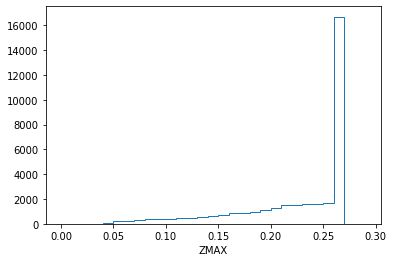

In [463]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [464]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03905   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

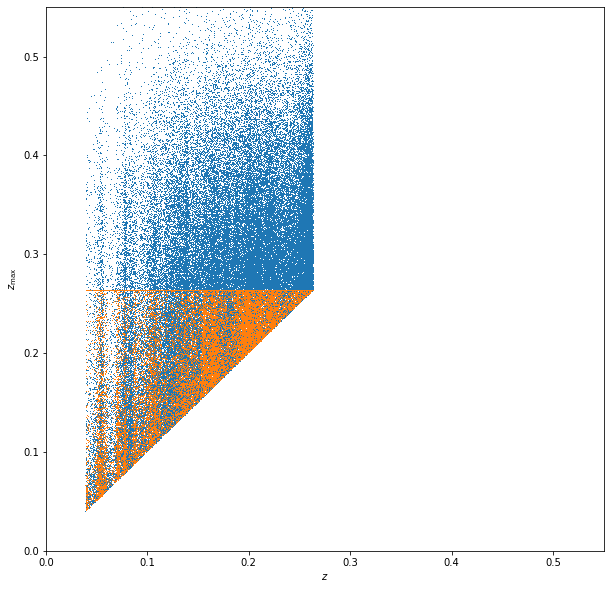

In [465]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

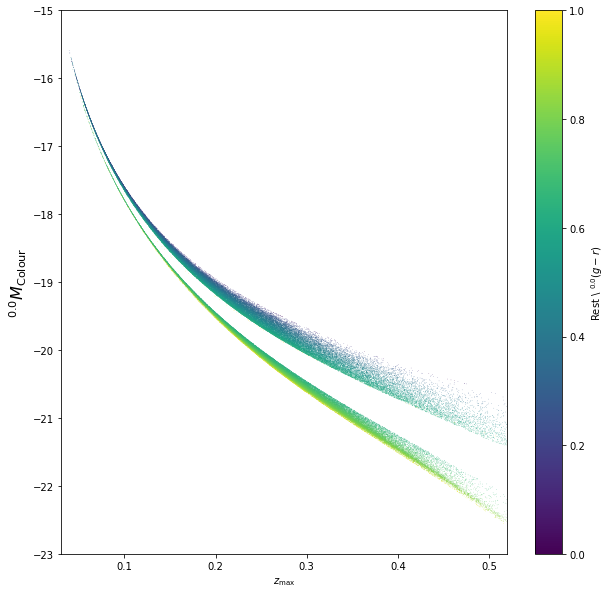

In [466]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

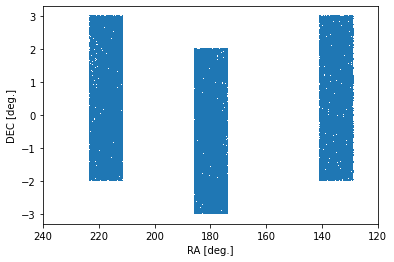

In [467]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [468]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
print(fpath)
gama_lf

/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_lumfn.fits


MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


In [469]:
# read in our stepwise
fpath = '/cosma/home/durham/dc-moor2/data/{}/gama_gold_lumfn_step.fits'.format(version)
lumfn_step = Table.read(fpath)

# read in TMR stepwise digitalisation
fpath = '/cosma/home/durham/dc-moor2/DESI/data/tmr_ref_stepwise.txt'
lumfn_TMR = Table.read(fpath, format='ascii', names=['Ms', 'PHI_STEP'])

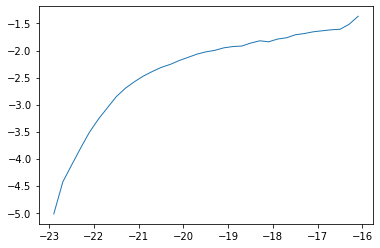

In [470]:
pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR', lw=1.)


/tmp/ipykernel_166563/3883704093.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_166563/3883704093.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)
/tmp/ipykernel_166563/3883704093.py:10: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)


Text(0.5, 1.0, 'GAMA')

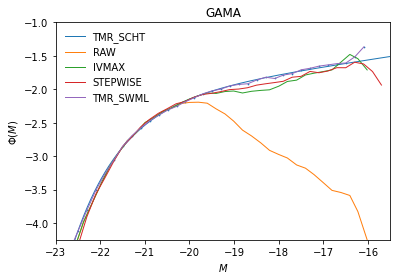

In [471]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR_SCHT', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

offset = 1.15
pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)

pl.scatter(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], s=0.5)
pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR_SWML', lw=1.)



pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

Text(0.5, 0, '$V/V_{Max}$')

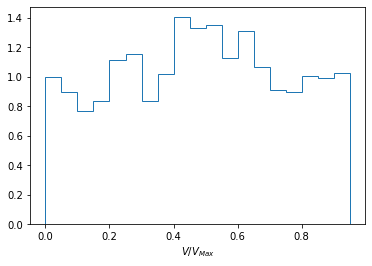

In [472]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

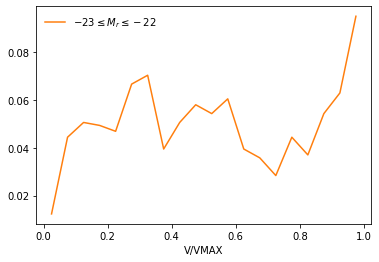

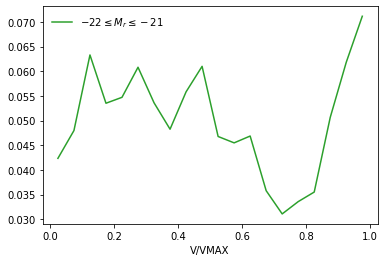

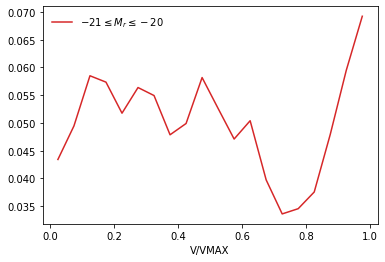

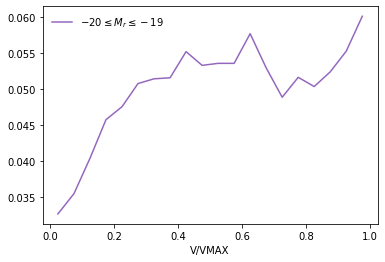

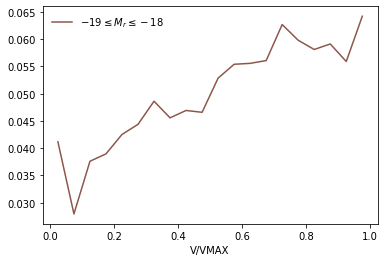

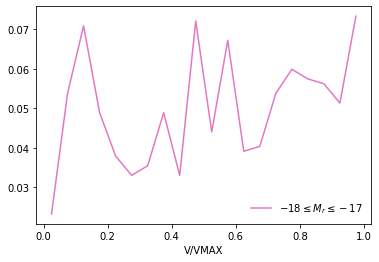

In [411]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [412]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,0.08135,259.6079029836754,37.07158954561004,G12,0,0,-239.97727236461046,0.6935893874232879,-6.905119636685518,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,14.160493,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,-23.01412754054145,37.09571093614177,37.17462043757514,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,0.10734,348.95950671254064,37.71387517159247,G12,0,0,-314.6983622428863,-11.998751500068654,-11.395465440223349,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,14.328211,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,-23.528504033267527,37.75259506392482,37.85671486395601,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,0.25162,896.9591792306916,39.76386339337955,G12,0,0,-713.9407537359408,-52.154217318169536,-33.75421886554996,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,14.425353,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,-25.687145139771815,39.868426780897494,40.11249819000375,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,0.14906,498.5745074806278,38.488650344529816,G9,0,0,-318.87403319626134,293.4040460252725,22.374975832994306,316.42056432935635,-296.0721303565518,22.05771769704219,0.7411823,14.904024,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,-23.738938927748485,38.49837484965591,38.64296305189399,38.32695588479309,-0.071437510431278

In [413]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.

In [414]:
#G9 = gama_lf
#G12 = gama_lf
#G15 = gama_lf

/tmp/ipykernel_166563/375866776.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(G9['MEDIAN_M'], np.log10(G9['PHI_IVMAX']), label='IVMAX (G9)', lw=1.)
/tmp/ipykernel_166563/375866776.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(G12['MEDIAN_M'], np.log10(G12['PHI_IVMAX']), label='IVMAX (G12)', lw=1.)
/tmp/ipykernel_166563/375866776.py:8: RuntimeWarning: divide by zero encountered in log10
  pl.plot(G15['MEDIAN_M'], np.log10(G15['PHI_IVMAX']), label='IVMAX (G15)', lw=1.)
/tmp/ipykernel_166563/375866776.py:9: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX (all)', lw=1.)


Text(0.5, 1.0, 'GAMA')

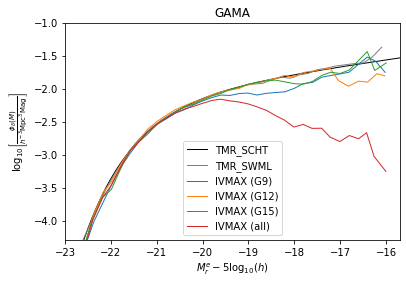

In [415]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')
pl.plot(Ms, np.log10(sc), label='TMR_SCHT', lw=1., color='black')
pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR_SWML', lw=1., color='gray')

pl.plot(G9['MEDIAN_M'], np.log10(G9['PHI_IVMAX']), label='IVMAX (G9)', lw=1.)
pl.plot(G12['MEDIAN_M'], np.log10(G12['PHI_IVMAX']), label='IVMAX (G12)', lw=1.)
pl.plot(G15['MEDIAN_M'], np.log10(G15['PHI_IVMAX']), label='IVMAX (G15)', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX (all)', lw=1.)

pl.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
pl.legend()
pl.xlim(-23, -15.7)
pl.ylim(-4.3, -1.0)

pl.title(survey.upper())

/tmp/ipykernel_166563/162434789.py:8: RuntimeWarning: divide by zero encountered in true_divide
  G9_ratio = np.log10(G9['PHI_IVMAX'] / TMR_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/162434789.py:8: RuntimeWarning: invalid value encountered in true_divide
  G9_ratio = np.log10(G9['PHI_IVMAX'] / TMR_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/162434789.py:8: RuntimeWarning: divide by zero encountered in log10
  G9_ratio = np.log10(G9['PHI_IVMAX'] / TMR_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/162434789.py:9: RuntimeWarning: divide by zero encountered in true_divide
  G12_ratio = np.log10(G12['PHI_IVMAX'] / TMR_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/162434789.py:9: RuntimeWarning: invalid value encountered in true_divide
  G12_ratio = np.log10(G12['PHI_IVMAX'] / TMR_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/162434789.py:10: RuntimeWarning: divide by zero encountered in true_divide
  G15_ratio = np.log10(G15['PHI_IVMAX'] / TMR_curve(G15['MEDIAN_M']))
/tmp/ipykernel_16656

Text(0.5, 1.0, 'GAMA ratios (vs. TMR SCHT)')

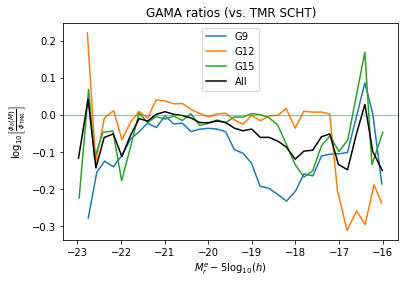

In [348]:
'''
Generate ratio plot vs. TMR Scht
'''
from   scipy.interpolate import interp1d

TMR_curve = interp1d(Ms, sc, kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)

G9_ratio = np.log10(G9['PHI_IVMAX'] / TMR_curve(G9['MEDIAN_M']))
G12_ratio = np.log10(G12['PHI_IVMAX'] / TMR_curve(G12['MEDIAN_M']))
G15_ratio = np.log10(G15['PHI_IVMAX'] / TMR_curve(G15['MEDIAN_M']))
all_ratio = np.log10(gama_lf['PHI_IVMAX'] / TMR_curve(gama_lf['MEDIAN_M']))


plt.plot(G9['MEDIAN_M'], G9_ratio, label='G9')
plt.plot(G12['MEDIAN_M'], G12_ratio, label='G12')
plt.plot(G15['MEDIAN_M'], G15_ratio, label='G15')
plt.plot(gama_lf['MEDIAN_M'], all_ratio, label='All', color='black')
plt.axhline(0., ls='-', lw=0.5)
plt.legend()

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{\phi_{TMR}} \right] $')
plt.title(survey.upper() + ' ratios (vs. TMR SCHT)')

/tmp/ipykernel_166563/4138319139.py:8: RuntimeWarning: invalid value encountered in true_divide
  G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/4138319139.py:8: RuntimeWarning: divide by zero encountered in log10
  G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/4138319139.py:9: RuntimeWarning: invalid value encountered in true_divide
  G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/4138319139.py:9: RuntimeWarning: divide by zero encountered in log10
  G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/4138319139.py:10: RuntimeWarning: divide by zero encountered in true_divide
  G15_ratio = np.log10(G15['PHI_IVMAX'] / all_curve(G15['MEDIAN_M']))
/tmp/ipykernel_166563/4138319139.py:10: RuntimeWarning: invalid value encountered in true_divide
  G15_ratio = np.log10(G15['PHI_IVMAX'] / all_curve(G15['MEDIAN_M']))
/tmp/ipykernel_16

Text(0.5, 1.0, 'GAMA ratios (vs. GAMA ALL)')

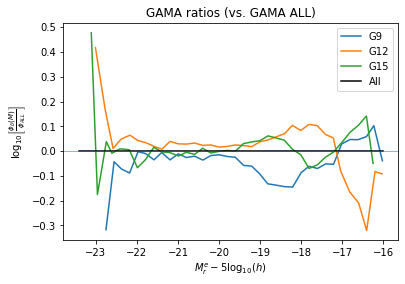

In [356]:
'''
Generate ratio plot vs. My GAMA (all fields)
'''
from   scipy.interpolate import interp1d

all_curve = interp1d(gama_lf['MEDIAN_M'], gama_lf['PHI_IVMAX'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)

G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
G15_ratio = np.log10(G15['PHI_IVMAX'] / all_curve(G15['MEDIAN_M']))
all_ratio = np.log10(gama_lf['PHI_IVMAX'] / all_curve(gama_lf['MEDIAN_M']))


plt.plot(G9['MEDIAN_M'], G9_ratio, label='G9')
plt.plot(G12['MEDIAN_M'], G12_ratio, label='G12')
plt.plot(G15['MEDIAN_M'], G15_ratio, label='G15')
plt.plot(gama_lf['MEDIAN_M'], all_ratio, label='All', color='black')
plt.axhline(0., ls='-', lw=0.5)
plt.legend()

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{\phi_{ALL}} \right] $')
plt.title(survey.upper() + ' ratios (vs. GAMA ALL)')

/tmp/ipykernel_166563/1854629919.py:2: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)
/tmp/ipykernel_166563/1854629919.py:4: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP']*10**-offset), label='STEPWISE', lw=1.)


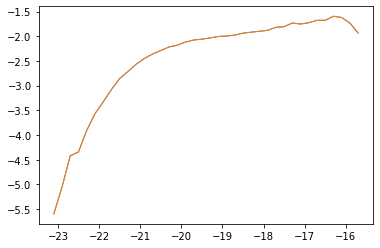

In [361]:
offset = 1.15
pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=1.)

pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP']*10**-offset), label='STEPWISE', lw=1.)

In [362]:
lumfn_step['PHI_STEP_OFFSET'] = lumfn_step['PHI_STEP']*10**-offset

/tmp/ipykernel_166563/2492519926.py:8: RuntimeWarning: divide by zero encountered in true_divide
  G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/2492519926.py:8: RuntimeWarning: invalid value encountered in true_divide
  G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/2492519926.py:8: RuntimeWarning: divide by zero encountered in log10
  G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
/tmp/ipykernel_166563/2492519926.py:9: RuntimeWarning: invalid value encountered in true_divide
  G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/2492519926.py:9: RuntimeWarning: divide by zero encountered in log10
  G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
/tmp/ipykernel_166563/2492519926.py:10: RuntimeWarning: invalid value encountered in true_divide
  G15_ratio = np.log10(G15['PHI_IVMAX'] / all_curve(G15['MEDIAN_M']))
/tmp/ipykernel_166563

Text(0.5, 1.0, 'GAMA ratios (vs. GAMA STEPWISE)')

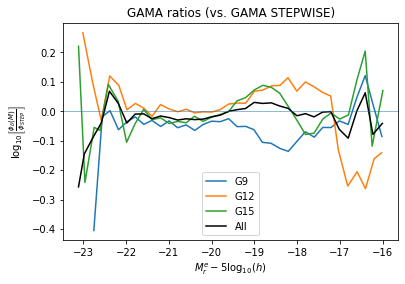

In [366]:
'''
Generate ratio plot vs. our stepwise
'''
from   scipy.interpolate import interp1d

all_curve = interp1d(lumfn_step['Ms'], lumfn_step['PHI_STEP_OFFSET'], kind='linear', copy=True, bounds_error=False, fill_value=0.0, assume_sorted=False)

G9_ratio = np.log10(G9['PHI_IVMAX'] / all_curve(G9['MEDIAN_M']))
G12_ratio = np.log10(G12['PHI_IVMAX'] / all_curve(G12['MEDIAN_M']))
G15_ratio = np.log10(G15['PHI_IVMAX'] / all_curve(G15['MEDIAN_M']))
all_ratio = np.log10(gama_lf['PHI_IVMAX'] / all_curve(gama_lf['MEDIAN_M']))


plt.plot(G9['MEDIAN_M'], G9_ratio, label='G9')
plt.plot(G12['MEDIAN_M'], G12_ratio, label='G12')
plt.plot(G15['MEDIAN_M'], G15_ratio, label='G15')
plt.plot(gama_lf['MEDIAN_M'], all_ratio, label='All', color='black')
plt.axhline(0., ls='-', lw=0.5)
plt.legend()

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{\phi_{STEP}} \right] $')
plt.title(survey.upper() + ' ratios (vs. GAMA STEPWISE)')

In [451]:
dat = Table.read('/cosma/home/durham/dc-moor2/DESI/data/TMR_red_all', format='ascii')

In [452]:
dat.rename_column('col1', 'MS')
dat.rename_column('col2', 'PHI')

In [453]:
dat.write('/cosma/home/durham/dc-moor2/DESI/data/TMR_red_all.fits', format='fits', overwrite=True)

In [421]:
#gama_all = gama_lf
#gama_blue = gama_lf
#gama_red = gama_lf

'''
TODO: 1) Save gama_blue, gama_red - DONE
    2) Digitalise to fits - DONE
    3) Add digitalise - DONE
    4) Add Schechter
    5) Add Figure 5. - DONE
    6) Figure for Tutoring (Gila and Cameron)
    7) Prepare for Tunis
    8) Book Cuba
    9) Fix Jackknife
    10) Cuneiform
    11) Spanish
    12) Arabic
    13) General Research
'''

In [454]:
tmr_red = Table.read('/cosma/home/durham/dc-moor2/DESI/data/TMR_red_all.fits', format='fits')
tmr_blue = Table.read('/cosma/home/durham/dc-moor2/DESI/data/TMR_blue_all.fits', format='fits')

/tmp/ipykernel_166563/3853772726.py:5: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_all['MEDIAN_M'], np.log10(gama_all['PHI_IVMAX']), label='IVMAX (all)', lw=1., color='black')
/tmp/ipykernel_166563/3853772726.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_blue['MEDIAN_M'], np.log10(gama_blue['PHI_IVMAX']), label='IVMAX (blue)', lw=1., color='blue')
/tmp/ipykernel_166563/3853772726.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_red['MEDIAN_M'], np.log10(gama_red['PHI_IVMAX']), label='IVMAX (red)', lw=1., color='red')
/tmp/ipykernel_166563/3853772726.py:9: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_red['MEDIAN_M'], np.log10(gama_blue['PHI_IVMAX']+gama_red['PHI_IVMAX']), label='IVMAX (summation)', lw=1., color='black')


Text(0.5, 1.0, 'GAMA')

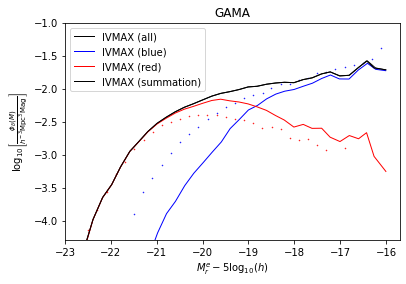

In [455]:
'''
COLOURS
'''

pl.plot(gama_all['MEDIAN_M'], np.log10(gama_all['PHI_IVMAX']), label='IVMAX (all)', lw=1., color='black')
pl.plot(gama_blue['MEDIAN_M'], np.log10(gama_blue['PHI_IVMAX']), label='IVMAX (blue)', lw=1., color='blue')
pl.plot(gama_red['MEDIAN_M'], np.log10(gama_red['PHI_IVMAX']), label='IVMAX (red)', lw=1., color='red')

pl.plot(gama_red['MEDIAN_M'], np.log10(gama_blue['PHI_IVMAX']+gama_red['PHI_IVMAX']), label='IVMAX (summation)', lw=1., color='black')

pl.scatter(tmr_red['MS'], tmr_red['PHI'], s=0.25, color='red')
pl.scatter(tmr_blue['MS'], tmr_blue['PHI'], s=0.25, color='blue')

pl.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
pl.legend()
pl.xlim(-23, -15.7)
pl.ylim(-4.3, -1.0)
pl.title(survey.upper())